# **Dataset**

The dataset from the GURTEEN station, contain a dayly(time series) Weather observations from January 1975 to December 2022 (based on column headers and data value) .

It is a multivariate series comprised of 17 variables and 5685; they are:

# **Features' descriptions**

 date:  -  00 to 00 utc   Marks the specific date for the weather observation.

rain:  -  Precipitation Amount (mm)   Daily amount of rainfall in millimeters (mm).


maxtp: -  Maximum Air Temperature (C) The highest temperature recorded during the day.

mintp: -  Minimum  Air Temperature (C)  The lowest temperature recorded during the day.


gmin:  -  09utc Grass Minimum Temperature (C)  Lowest temperature measured near the ground surface.


soil:  -  Mean 10cm soil temperature (C)

cbl:   -  Mean CBL Pressure (hpa)

wdsp:  -  Mean Wind Speed (kt)  Average wind speed over the day.

hm:    -  Highest ten minute mean wind speed (kt)

ddhm:  -  Wind Direction at max 10 min mean (deg)                

hg:    -  Highest Gust (kt)

pe:    -  Potential Evapotranspiration (mm)

evap:  -  Evaporation (mm)

smd_wd:-  Soil Moisture Deficits(mm) well drained

smd_md:-  Soil Moisture Deficits(mm) moderately drained

smd_pd:-  Soil Moisture Deficits(mm) poorly drained

glorad:-  Global Radiation (J/cm sq.)  Total solar radiation received at ground level.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the data

In [ ]:
data = pd.read_csv("dly1475.csv")
data.shape
print(data.head()) # print the first five rows

    Station Name: GURTEEN Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0   Station Height: 75 M         NaN        NaN        NaN        NaN   
1       Latitude:53.035          NaN        NaN        NaN        NaN   
2                     NaN        NaN        NaN        NaN        NaN   
3                     NaN        NaN        NaN        NaN        NaN   
4  date:  -  00 to 00 utc        NaN        NaN        NaN        NaN   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
0        NaN        NaN        NaN        NaN        NaN         NaN   
1        NaN        NaN        NaN        NaN        NaN         NaN   
2        NaN        NaN        NaN        NaN        NaN         NaN   
3        NaN        NaN        NaN        NaN        NaN         NaN   
4        NaN        NaN        NaN        NaN        NaN         NaN   

  Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16  
0         NaN         NaN         NaN         NaN   

## Comments:

The dataset contains meteorological data from the GURTEEN station but is poorly structured:

It contains 5685 rows and 17 columns.

The first rows are not tabular data but rather metadata (e.g., "Station Height: 75 M", "Latitude: 53.035").

Many columns are named "Unnamed" and contain missing values. The real data starts on line 25 (index 24), with column names on this line and values just below.

In [ ]:
# Load the data , read the data ignoring the 24 descristive lines of the variables (thus 23 descriptins and one line of no columns) using pandas skiprows.
df = pd.read_csv("dly1475.csv",skiprows=24)
df.shape
print(df.head())

        date  maxtp  mintp  gmin rain     cbl  wdsp  hm  ddhm  hg    soil  \
0  01-Oct-09   12.4    8.2   6.1    0  1013.9   4.6   8     0  12   13.37   
1  02-Oct-09   15.7    8.1   5.9  0.4  1008.9  10.1  16   230  26   12.66   
2  03-Oct-09   13.9    7.7  10.1  0.9    1000  12.5  20   240  32   12.32   
3  04-Oct-09   12.4    6.6   4.1    0  1002.7   4.1   8   260  13  11.205   
4  05-Oct-09   16.0    5.4   1.3    0   998.4   5.7  13   150  18   12.24   

    pe evap smd_wd smd_md smd_pd glorad  
0  0.8    1    0.8    0.8    0.8    489  
1  1.1  1.5    1.4    1.4    1.4    573  
2  1.1  1.6    1.6    1.6    1.6    669  
3  0.9  1.2    2.5    2.5    2.5    645  
4  1.2  1.7    3.6    3.6    3.7   1066  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5661 entries, 0 to 5660
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5661 non-null   object 
 1   maxtp   5661 non-null   float64
 2   mintp   5661 non-null   float64
 3   gmin    5661 non-null   object 
 4   rain    5661 non-null   object 
 5   cbl     5661 non-null   object 
 6   wdsp    5661 non-null   object 
 7   hm      5661 non-null   int64  
 8   ddhm    5661 non-null   int64  
 9   hg      5661 non-null   int64  
 10  soil    5661 non-null   object 
 11  pe      5661 non-null   object 
 12  evap    5661 non-null   object 
 13  smd_wd  5661 non-null   object 
 14  smd_md  5661 non-null   object 
 15  smd_pd  5661 non-null   object 
 16  glorad  5661 non-null   object 
dtypes: float64(2), int64(3), object(12)
memory usage: 752.0+ KB


## Check missing values

In [ ]:
# Check NaN values
print(df.isna())
print(df.isna().sum())
print(df.isna().sum().sum())

       date  maxtp  mintp   gmin   rain    cbl   wdsp     hm   ddhm     hg  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5656  False  False  False  False  False  False  False  False  False  False   
5657  False  False  False  False  False  False  False  False  False  False   
5658  False  False  False  False  False  False  False  False  False  False   
5659  False  False  False  False  False  False  False  False  False  False   
5660  False  False  False  False  False  False  False  False  False  False   

       soil     pe   evap  smd_wd  smd_md  smd_pd  glorad  
0  

### The data set does not contain any missing values.

In [ ]:
# Clean missing data with information and describes variable
df = df.dropna(axis=1, how='all')

In [ ]:
# Convert data types into a valid format
df['date'] = pd.to_datetime(df['date'], errors='coerce')# errors='coerce to set invalid parsing to NAT and we will drop all the lines with NAT data values
df = df.dropna(subset=['date'])
df = df.sort_values('date') # tri per date
print(df)

<ipython-input-21-0e38ae9ab912>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')# errors='coerce to set invalid parsing to NAT and we will drop all the lines with NAT data values


           date  maxtp  mintp  gmin rain     cbl  wdsp  hm  ddhm  hg    soil  \
0    2009-10-01   12.4    8.2   6.1    0  1013.9   4.6   8     0  12   13.37   
1    2009-10-02   15.7    8.1   5.9  0.4  1008.9  10.1  16   230  26   12.66   
2    2009-10-03   13.9    7.7  10.1  0.9    1000  12.5  20   240  32   12.32   
3    2009-10-04   12.4    6.6   4.1    0  1002.7   4.1   8   260  13  11.205   
4    2009-10-05   16.0    5.4   1.3    0   998.4   5.7  13   150  18   12.24   
...         ...    ...    ...   ...  ...     ...   ...  ..   ...  ..     ...   
5656 2025-03-27   15.9    6.8   3.1  3.7  1006.1  11.1  19   200  31  10.153   
5657 2025-03-28    9.4    2.3   1.6  2.4  1005.3  10.6  21   280  30   8.288   
5658 2025-03-29   12.5    2.9   0.2  1.1  1008.2  11.6  18   240  26   8.022   
5659 2025-03-30   15.6    6.2   4.3    0  1014.4   6.2  11   260  18   9.883   
5660 2025-03-31   17.1    5.6   4.2    0    1016   6.9  13   150  18  11.155   

       pe evap smd_wd smd_md smd_pd glo

In [ ]:
#  Convert key columns to numeric
for col in ['maxtp', 'mintp', 'gmin', 'rain', 'wdsp', 'glorad']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Create temporal features year, month , day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df

,date,maxtp,mintp,gmin,rain,cbl,wdsp,hm,ddhm,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad,year,month,day
0,2009-10-01,12.4,8.2,6.1,0.0,1013.9,4.6,8,0,12,13.37,0.8,1,0.8,0.8,0.8,489.0,2009,10,1
1,2009-10-02,15.7,8.1,5.9,0.4,1008.9,10.1,16,230,26,12.66,1.1,1.5,1.4,1.4,1.4,573.0,2009,10,2
2,2009-10-03,13.9,7.7,10.1,0.9,1000,12.5,20,240,32,12.32,1.1,1.6,1.6,1.6,1.6,669.0,2009,10,3
3,2009-10-04,12.4,6.6,4.1,0.0,1002.7,4.1,8,260,13,11.205,0.9,1.2,2.5,2.5,2.5,645.0,2009,10,4
4,2009-10-05,16.0,5.4,1.3,0.0,998.4,5.7,13,150,18,12.24,1.2,1.7,3.6,3.6,3.7,1066.0,2009,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,2025-03-27,15.9,6.8,3.1,3.7,1006.1,11.1,19,200,31,10.153,1.6,2.3,7,7,2.1,903.0,2025,3,27
5657,2025-03-28,9.4,2.3,1.6,2.4,1005.3,10.6,21,280,30,8.288,1.3,2.1,5.8,5.8,1,1310.0,2025,3,28
5658,2025-03-29,12.5,2.9,0.2,1.1,1008.2,11.6,18,240,26,8.022,0.7,1.2,5.4,5.4,0.7,470.0,2025,3,29
5659,2025-03-30,15.6,6.2,4.3,0.0,1014.4,6.2,11,260,18,9.883,1.8,2.6,7.1,7.1,2.4,1431.0,2025,3,30


In [ ]:
# Display descriptive statistics
print(df[["maxtp","mintp", "rain"]].describe())

             maxtp        mintp         rain
count  5661.000000  5661.000000  5656.000000
mean     13.495813     5.824360     2.562323
std       5.097440     4.708719     4.284257
min      -7.000000   -13.400000     0.000000
25%      10.000000     2.300000     0.000000
50%      13.400000     6.000000     0.600000
75%      17.200000     9.500000     3.300000
max      31.000000    17.800000    45.800000


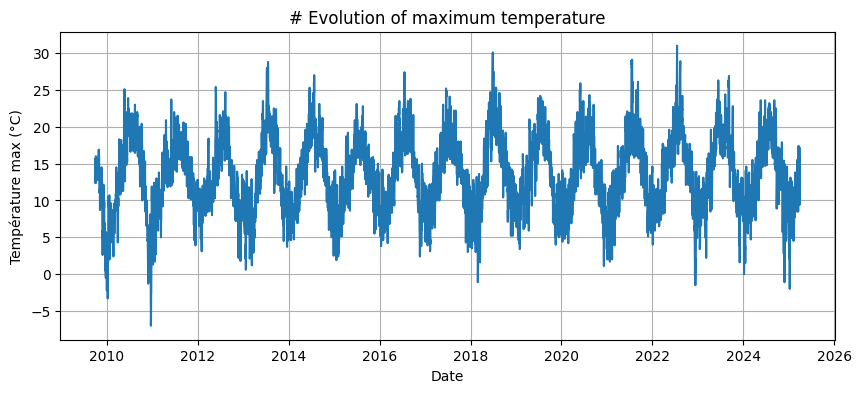

In [ ]:
# Trace the evolution of maximum temperature
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["maxtp"])
plt.title("# Evolution of maximum temperature")
plt.xlabel("Date")
plt.ylabel("Température max (°C)")
plt.grid(True)
plt.show()

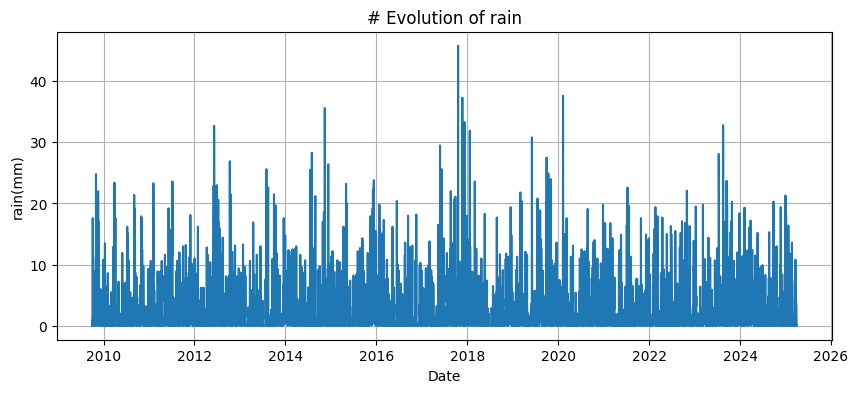

In [ ]:
# Trace the evolution of rain
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["rain"])
plt.title("# Evolution of rain")
plt.xlabel("Date")
plt.ylabel("rain(mm)")
plt.grid(True)
plt.show()

Patterns in Observations Over Time

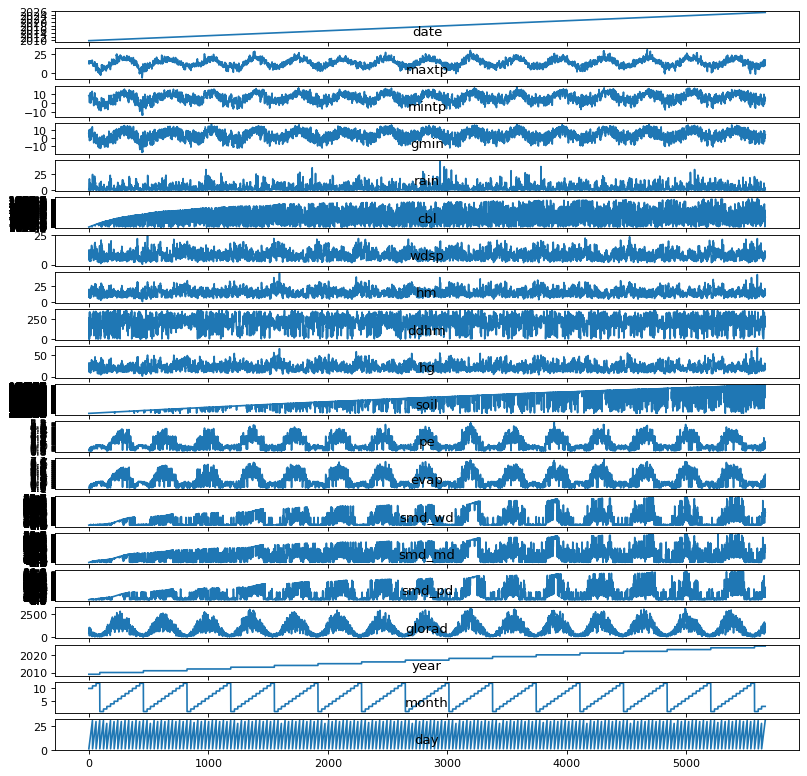

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(12, 12), dpi=80)
for i in range(len(df.columns)):
	pyplot.subplot(len(df.columns), 1, i+1)
	name = df.columns[i]
	pyplot.plot(df[name])
	pyplot.title(name, y=0)
pyplot.show()

Lets look at the distribution for each variable in the data

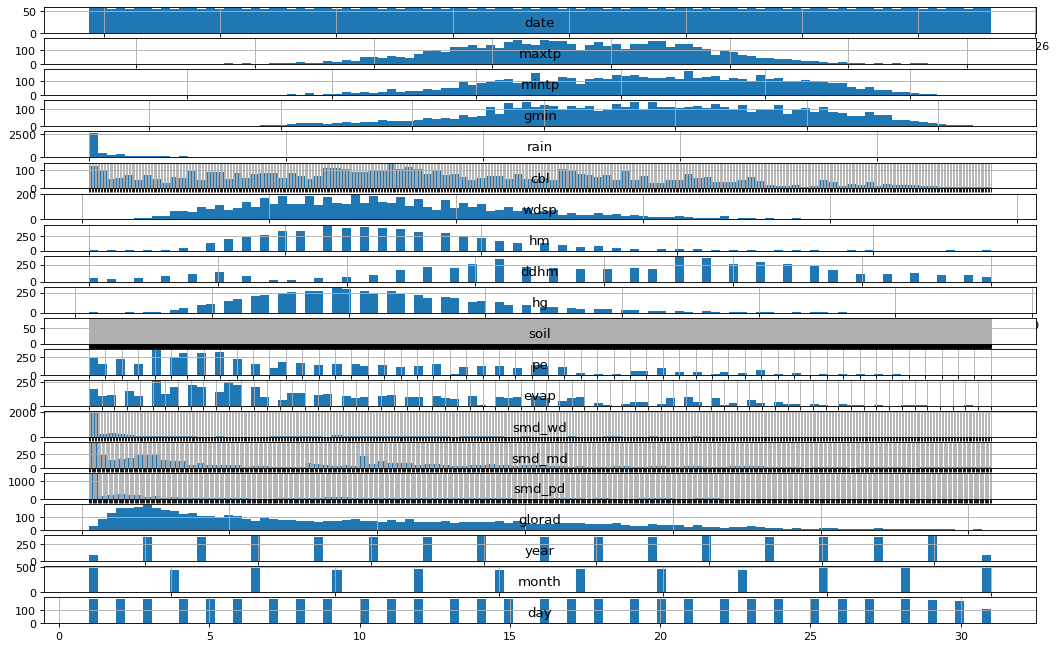

In [ ]:
pyplot.figure(figsize=(16, 10), dpi=80)
for i in range(len(df.columns)):
	pyplot.subplot(len(df.columns), 1, i+1)
	name = df.columns[i]
	df[name].hist(bins=100)
	pyplot.title(name, y=0)
pyplot.show()

In [ ]:
# Create target columns for forecasting
df["maxtp+1"] = df["maxtp"].shift(-1)  # This shifts the "maxtp" column up by one row, in other words, it places the next day's maximum temperature (maxtp) into a new column "maxtp+1".his helps create a target for predicting the following day’s temperature.
df["rain+1"] = df["rain"].shift(-1) # The next day’s rain value is moved to "rain+1"

df["maxtp+7"] = df["maxtp"].shift(-7) # "maxtp" up by 7 days, "maxtp+7" now holds the maximum temperature one week ahead for each given day.
df["rain+7"] = df["rain"].shift(-7)  # Same concept for rain, moving values forward by 7 days.


In [ ]:
# Removing missing values after shifting
df.dropna(subset=['maxtp+1', 'rain+1','maxtp+7','rain+7'], inplace=True)